# Домашнее задание. Урок 1. Основы обучения нейронных сетей

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [104]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

### Шаг 1. Определение функций, которые понадобяться для обучения

In [107]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized


# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if (l[j] == 1):
                arr[i] = j + 1
    return arr


# сигмоида и ее производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_deriv(x):
    return (x) * (1 - (x))


# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

### Шаг 2. Подготовка тренировочных данных

In [144]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
iris_data.head()  # расскоментируйте, чтобы посмотреть структуру данных

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [145]:
FEATURES = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
RESULTS = 'Species'
dict_results = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

In [146]:
# репрезентация данных в виде графиков
# sns.pairplot(iris_data.drop("Id", axis=1), hue=RESULTS)

In [147]:
# замена текстовых значений на цифровые
iris_data[RESULTS].replace(dict_results, list(range(0, len(dict_results))), inplace=True)

In [148]:
# формирование входных данных
x = pd.DataFrame(iris_data, columns=FEATURES)
x = normalize(x.values)

# формирование выходных данных(результатов)
y = pd.DataFrame(iris_data, columns=[RESULTS])
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [149]:
x

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [150]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Шаг 3. Обученние нейронной сети

Перепишем функцию в ООП стиль

In [165]:
class Neuro_1:
    # массив для ошибок, чтобы потом построить график
    errors = []
    # массив весов
    w=[]
    # массив слоев
    layer=[]
    accuracy = 0
    outs=None

    def __init__(self, neuron_numb=3, learning_rate=0.05, num_epochs=10000):
        self.set_params(neuron_numb=neuron_numb, learning_rate=learning_rate,num_epochs=num_epochs)

    def set_params(self, neuron_numb=3, learning_rate=0.05, num_epochs=10000):
        # neuron_numb определим число нейронов скрытого слоя
        self.neuron_numb = neuron_numb
        # скорость обучения (learning rate)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.w = []
        self.errors = []
        self.layer = []
        self._generate_weights()


    def _generate_weights(self):
        self.w = []
        self.w.append(2 * np.random.random((4, self.neuron_numb)) - 1)  # для входного слоя   - 4 входа, 3 выхода
        self.w.append(2 * np.random.random((self.neuron_numb, 3)) - 1)  # для внутреннего слоя - 5 входов, 3 выхода

    def fit(self, X, y):
        layer0 = X

        # процесс обучения
        for i in range(self.num_epochs):
            # прямое распространение(feed forward)
            layer1 = self.sigmoid(np.dot(layer0, self.w[0]))
            layer2 = self.sigmoid(np.dot(layer1, self.w[1]))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y - layer2  # производная функции потерь = производная квадратичных потерь
            layer2_delta = layer2_error * self.sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(self.w[1].T)
            layer1_delta = layer1_error * self.sigmoid_deriv(layer1)
            # коррекция
            self.w[1] += layer1.T.dot(layer2_delta) * self.learning_rate
            self.w[0] += layer0.T.dot(layer1_delta) * self.learning_rate
            # метрика модели
            error = np.mean(np.abs(layer2_error))
            self.errors.append(error)
            self.accuracy = (1 - error) * 100

            self.outs = layer2

    # сигмоида и ее производная
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        return (x) * (1 - (x))


In [166]:
neuro1 = Neuro_1()
neuro1.fit(X_train, y_train)

In [167]:
neuro1.accuracy

97.68085256841962

In [168]:
neuro1.w

[array([[ -3.14494376,   4.37091016,  10.79474968],
        [ -8.06493619,   2.59618405,  18.37638453],
        [ 13.92215725,   2.45015375, -19.9308429 ],
        [  6.27455226,   0.93821184, -15.04383218]]),
 array([[ -9.27867617,   9.34090981,  12.85804904],
        [ -2.38064277,   0.88793096, -20.3689288 ],
        [  7.44984994, -20.72696939,  15.87827571]])]

### Шаг 4. Демонстрация полученных результатов


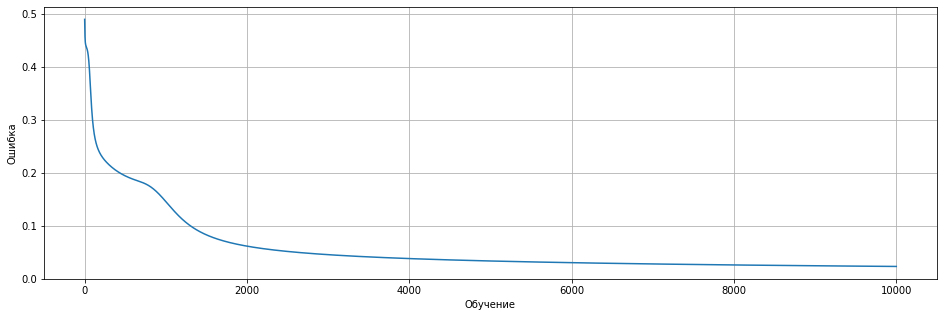

In [169]:
errors = neuro1.errors
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()  # расскоментируйте, чтобы посмотреть

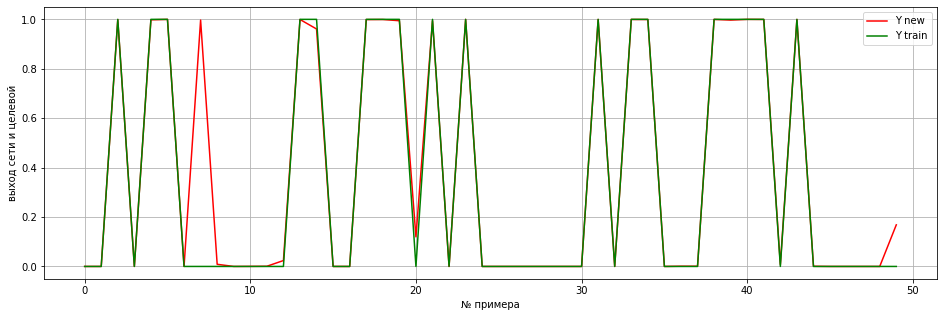

In [170]:
layer2 = neuro1.outs
N = 50
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, 1], 'r', label='Y new')
plt.plot(y_train[:N, 1], 'g', label='Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.grid()
plt.show()  # расскоментируйте, чтобы посмотреть


### Проведем поиск омпимального решения по сетке

In [173]:
grid_param = dict(neuron_numb=[3, 5, 10, 20], learning_rate=[0.1, 0.05, 0.01], num_epochs=[5000, 10000, 20000])
neuro1_1 = Neuro_1()
for nnum in grid_param['neuron_numb']:
    for lrate in grid_param['learning_rate']:
        for nep in grid_param['num_epochs']:
            neuro1_1.set_params(neuron_numb=nnum, learning_rate=lrate, num_epochs=nep)
            neuro1_1.fit(X_train, y_train)
            print(f' Количество нейронов: {nnum:2}, Скорость обучения: {lrate:5}, Количество эпох: {nep}, Точность - {neuro1_1.accuracy}')

 Количество нейронов:  3, Скорость обучения:   0.1, Количество эпох: 5000, Точность - 97.70469233364972
 Количество нейронов:  3, Скорость обучения:   0.1, Количество эпох: 10000, Точность - 98.44765762176854
 Количество нейронов:  3, Скорость обучения:   0.1, Количество эпох: 20000, Точность - 98.80872360394683
 Количество нейронов:  3, Скорость обучения:  0.05, Количество эпох: 5000, Точность - 96.9791704095711
 Количество нейронов:  3, Скорость обучения:  0.05, Количество эпох: 10000, Точность - 97.90093261510692
 Количество нейронов:  3, Скорость обучения:  0.05, Количество эпох: 20000, Точность - 98.46829274418548
 Количество нейронов:  3, Скорость обучения:  0.01, Количество эпох: 5000, Точность - 85.18220854964504
 Количество нейронов:  3, Скорость обучения:  0.01, Количество эпох: 10000, Точность - 94.15408165205959
 Количество нейронов:  3, Скорость обучения:  0.01, Количество эпох: 20000, Точность - 96.56511144053206
 Количество нейронов:  5, Скорость обучения:   0.1, Количес

>Вывод: модель максимальную точность показывает при достаточном количестве итераций обучения
> Рекордный результат при
> Количество нейронов: 20, Скорость обучения:   0.1, Количество эпох: 20000, Точность - 98.91990171673478

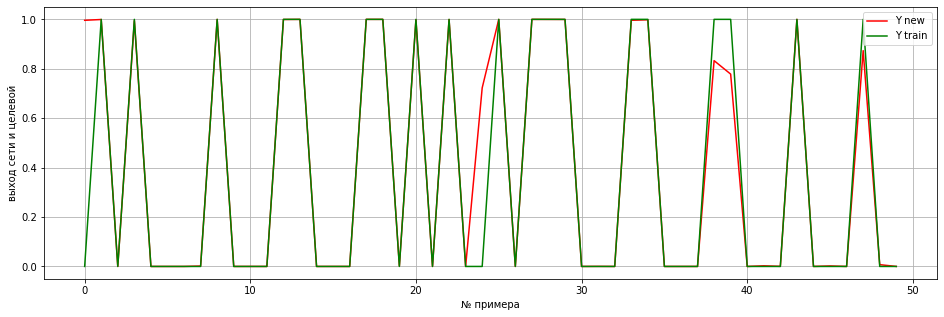

Аккуратность нейронной сети на тесте 96.72%


In [124]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t

N = 50
plt.figure(figsize=(16, 5))
plt.plot(layer2_t[:N, 1], 'r', label='Y new')
plt.plot(y_test[:N, 1], 'g', label='Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend()
plt.show()  # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t, 2)) + "%")

In [ ]:

# определим число нейронов скрытого слоя
neuron_numb = 10

# присваевание случайных весов

w0 = 2 * np.random.random((4, neuron_numb)) - 1  # для входного слоя   - 4 входа, 3 выхода
w1 = 2 * np.random.random((neuron_numb, neuron_numb)) - 1  # для внутреннего слоя n x n
w2 = 2 * np.random.random((neuron_numb, 3)) - 1  # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

layer0 = X_train

# процесс обучения
for i in range(10000):
    # прямое распространение(feed forward)
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3  # производная функции потерь = производная квадратичных потерь
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    # коррекция
    w2 += layer1.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

print("Аккуратность нейронной сети " + str(round(accuracy, 2)) + "%")

В этом уроке мы с вами рассматривали как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся как делать нейронные сети с помощью Keras и TensorFlow.

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Мы разобрались с основами обучения нейронных сетей и получили некоторое представление об архитектурах простых нейронных сетей. Давайте попробуем закрепить эти знания на практике. Кроме того на примере который будет изложен ниже возможно проясняться какие-либо оставшиеся вопросы.

В данном примере мы сделаем нейронную сеть которая будет отличать различные виды ириса между собой. Надо полагать данный датасет вам уже знаком. Логика работы этого кода будет такой же как и в первом разобранном примере, но только все компоненты этого кода будут несколько усложнены.

## Дополнительные материалы

<ol>
    <li>https://medium.com/topic/machine-learning</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>Глубокое обучение — Николенко С. И., Кадурин 2018</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Asifullah Khan, Anabia Sohail, Umme Zahoora, Aqsa Saeed Qureshi - A Survey of the Recent Architectures of Deep Convolutional Neural Networks 2019</li>
    <li>A direct adaptive method for faster backpropagation learning: the RPROP algorithm - Neural Networks, 1993</li>
    <li>Википедия</li>
    
</ol>